In [32]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)
import re
from sklearn.feature_extraction.text   import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import pickle
from sklearn.model_selection import train_test_split   
from sklearn.metrics import classification_report, f1_score, precision_score




In [2]:
class ArabicCleaning():
    def __init__(self):
        pass

    def clean(self, text):
        arabic_pattern =  r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDFF\uFE70-\uFEFF]'
        arabic_pattern_others =  r'[^\w\s\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFB50-\uFDFF\uFE70-\uFEFF]'

        def remove_special_words(text):
            words = text.split()
            text = [word for word in words if '#' not in word and '_' not in word]
            text = ' '.join(text)
            return text
        
        def keep_only_arabic_letters(text):
            words = text.split()
            processed_words = []
            for word in words:
                arabic_letters_only = ''.join([char for char in word if (re.match(arabic_pattern, char) and (char not in ["؟", "؛" , "،"]))])
                processed_words.append(arabic_letters_only)
            return ' '.join(processed_words)
        
        def check_empty(text):
            if len(text.split())==0:
                return None
            else :
                return text
            
        text = remove_special_words(text)
        text = re.sub(arabic_pattern_others, '', text)
        text = re.sub(r'[0-9]', '', text)
        text = re.sub(r'[a-zA-Z]', '', text)
        text = keep_only_arabic_letters(text)
        text = check_empty(text)    

        return text


In [7]:

df=pd.read_csv('cleaned_data.csv')

df['text'] = df['text'].apply(lambda x: ArabicCleaning().clean(x))


In [9]:
df

,id,text,dialect
0,1009754958479151232,قليلين ادب ومنافقين لو اختهم او قريبتهم تتعاكس تقولي عليهم من نشاط حقوق المرأة من ردة فعلهم,LY
1,1009794751548313600,الليبيين متقلبين بس بالنسبة ليا انا ميليشياوي زمان وتوة,LY
2,1019989115490787200,كل تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها غير كل البنات وبيحس كأنه يعرفها من زمان بعدين يتزوج وحدة منهن وممكن اثنين ولاثلاثة وتنقلب الرومانسية لعياط وشياط وتهزيب ذي اند,LY
3,1035479791758135168,رانيا عقليتك متخلفة اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم هو انسان قليل الادب اصلاً ثانياً شن ذنب يلي معندهش اب ولا ام ولا خوت ولا خوات يعني اليتيمة متستحقش تتزوج وثالثاً ليش البنت هي بس لازم ادير الف حساب للراجل هي متستحقش يندارلها الف حساب ولا هي عبدة,LY
4,1035481122921164800,شكلك متعقدة علشان الراجل لي تحبيه ازوج بنت يتيمة ولا بنت معندهش خوت هدي اعصابك وفكينا من التخلف امتاعك,LY
...,...,...,...
147479,982775354405376000,الناس دي بتنفخ في قربة مقدودة بالدارجي كده البلد دي لو ما الكيزان ديل راحو مافي حياه شريفه في البلد دي لان سبب الفساد والمصائب الموجودة,SD
147480,980728852224860160,انت عايش وين بره السودان ولا شنو ماشايف البحصل دا,SD
147481,975502734668500992,مااحرم نفسي ميسي حريف ولعاب برضو مدريدي وافتخر,SD
147482,980207908641263616,ياخي ديل ماخلو للشيطان وإبليس شي لكن يروحو وين من ربنا ونحن وراك وراك ياكوز ياعفن الأيام معدوده خلاص,SD


In [20]:
# use countvectorizer 
vectorizer = CountVectorizer()

# vectorize the text data
X = vectorizer.fit(df['text'])

# save the vectorizer
with open('vectorizer_ml.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [24]:

# load the vectorizer
with open('vectorizer_ml.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# vectorize the text data
X = vectorizer.transform(df['text'])

In [26]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, df['dialect'].values, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model_ml_lr = LogisticRegression(multi_class="multinomial",max_iter=1000)  

# Fit the model
model_ml_lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [27]:
# test result of the logistic regression model

predictions = model_ml_lr.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          EG       0.84      0.91      0.87     11532
          LB       0.84      0.83      0.84      5542
          LY       0.79      0.82      0.81      7252
          MA       0.86      0.65      0.74      2322
          SD       0.80      0.61      0.69      2849

    accuracy                           0.83     29497
   macro avg       0.83      0.77      0.79     29497
weighted avg       0.83      0.83      0.82     29497



In [31]:
# save the model
with open('model_ml_lr.pkl', 'wb') as f:
    pickle.dump(model_ml_lr, f)

### Decission Tree

In [33]:
# decission tree

# Initialize and train the logistic regression model
model_ml_dt = DecisionTreeClassifier(max_depth=1000, random_state=42)

# Fit the model
model_ml_dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=1000, random_state=42)

In [34]:
# test result of the logistic regression model

predictions = model_ml_dt.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          EG       0.75      0.77      0.76     11532
          LB       0.70      0.65      0.67      5542
          LY       0.55      0.67      0.61      7252
          MA       0.64      0.46      0.53      2322
          SD       0.56      0.40      0.47      2849

    accuracy                           0.66     29497
   macro avg       0.64      0.59      0.61     29497
weighted avg       0.66      0.66      0.66     29497



In [ ]:
# save the model
with open('model_ml_dt.pkl', 'wb') as f:
    pickle.dump(model_ml_dt, f)

## Real test

In [51]:


# Morocoo
text =  '''
        
        مابغيتش نشوفك مرة أخرى 
كنتمنى كتكون هادي كاتضحك 
عندي واحد السر بغا نقول ليك
 واش عندك الوقت باش تهضر معايا
 سمح ليا داكشي علاش ماكنشوفوش وقت طويل        

        '''


# # libya
# text = '''
        
# ايه حتى احنى عندنا صبي بالضمة تعني اسكبي لاكن صبي بالفتحة تعني انهضي
# في الشرق الليبي انقولوا سمحة اي جميلة مثلا  سلوى سمحة تعني سلوى جميلة
# في الشرق الليبي  انقولوا  منوا  مثلا منوا ايدق الباب  بمعنى من يطرق الباب وكذلك نقول منهو اللي ادق الباب
# باهي اكويس الحمدلله
       
#         '''


# # suddan
# text = '''
        
# االمال تلتوا ولا كتلتوا.
# بادر الضيف ولو ببرش وقرعة موية
# مسيك دربين ضهيب وركيب سرجين وقيع
# ذاد الحِبان ليهو مكان  أو ذاد الحِبان له مكان
        
#         '''


# #Lebanon
# text = '''
        
# يلّي باعك ببصلة، بيعو بقشرتها! يلّي بيعملك حمار، البُطة! إذا قلتلَّك تقبرني بتجيب المجرفة وبتطمني؟ الأكل ما إلك، بطنك ما إلك؟
        
#         '''


# # Egpyt
# text =  '''
        
# لو بتحبها كلم الى جمبها
# عمر الجزيرة ما تروح لشبه الجزيرة
#  بس أنت وعدتني إنكّ عمرك ما هتسبني؟!
# = مّنا عملتهالك مُفاجأه.
# الرجولة ضرب نار مش اكل فيشار
# ياللي خايف من خليك احسن لك مع العيال الطرية
# بدل ما تبصلها هات جردل واغسلها
# يلى عينك علينا شيلها الله يهديك ويهدينا
# مبلاش تقرب منى الكل زعل منى
# متلمسهاش دى جاية بعرقى مش ببلاش      
          
#         '''


text = ArabicCleaning().clean(text)
text = vectorizer.transform([text])
print(model_ml_lr.predict(text))



['MA']


In [52]:
# Get the predicted probabilities

predicted_probabilities = model_ml_lr.predict_proba(text)

classes = model_ml_lr.classes_

# Get the probabilities for each class
class_probabilities = dict(zip(classes, predicted_probabilities[0]))
class_probabilities= sorted(class_probabilities.items(), key=lambda x: x[1], reverse=True)

for i, (class_name, probability) in enumerate(class_probabilities):
    print(f"The probability of {class_name} is {(probability.round(3))*100:.1f}%")

The probability of MA is 100.0%
The probability of LY is 0.0%
The probability of SD is 0.0%
The probability of EG is 0.0%
The probability of LB is 0.0%


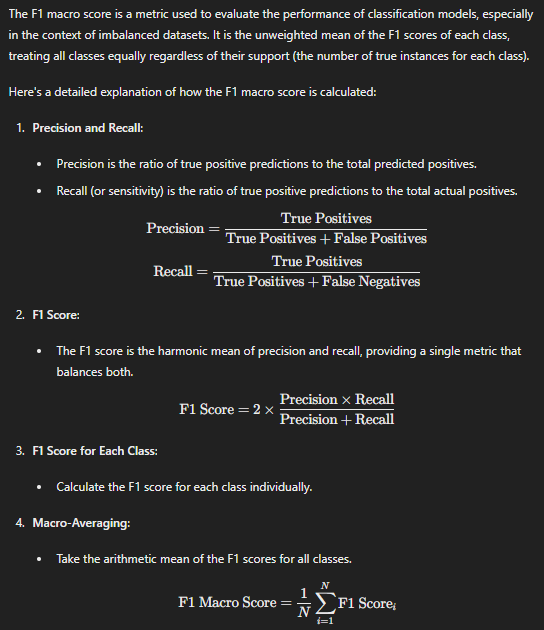

In [60]:
# instread of the vectorization try with tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['text'])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['dialect'].values, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model_ml_lr_new = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

# train the model
model_ml_lr_new.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [61]:
# test result of the logistic regression model

predictions = model_ml_lr_new.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          EG       0.82      0.93      0.87     11532
          LB       0.85      0.82      0.83      5542
          LY       0.77      0.83      0.80      7252
          MA       0.89      0.59      0.71      2322
          SD       0.86      0.54      0.66      2849

    accuracy                           0.82     29497
   macro avg       0.84      0.74      0.77     29497
weighted avg       0.82      0.82      0.81     29497

